<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analyzing Where Do People Drink?

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

-   Be confident about your data analysis skills


This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.


You will need the following libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



<b>Importing the Data</b>


Load the csv:


In [2]:
df= pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/drinks.csv')


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute dtype.


In [4]:
# Display the data types of each column
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Question 2</b> Use the method <code>groupby</code> to get the number of wine servings per continent:


In [5]:
# group wine-servings and continent
df_test = df[['wine_servings','continent']]

# get the number of wine servings per continent
df_group = df_test.groupby(['continent'], as_index = False).count()
df_group

,continent,wine_servings
0,Africa,53
1,Asia,44
2,Europe,45
3,North America,23
4,Oceania,16
5,South America,12


# <b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [7]:
# group beer-servings and continent
df_test_beer = df[['beer_servings','continent']]

# get the number of beer servings per continent
df_group_beer = df_test_beer.groupby(['continent'], as_index = False).count()

# get statistical summary and analysis of beer-servings for each continent
test=True
for continent in df_group_beer['continent'] :
    # get the statistical info for each continent for wine-servings
    df_continent = df_test_beer[df_test_beer['continent']== continent].describe()
    # reorganize name of columns
    df_continent.rename(columns={'beer_servings' : continent}, inplace = True)
    df_continent.rename_axis('beer_servings')
    # concatenate the dataframes and rename the dataframe 1st column
    if test:
        df_fusion = df_continent 
        test=False
    else:
        df_fusion = pd.concat([df_fusion,df_continent], axis = 1).rename_axis('beer_servings')
df_fusion

,Africa,Asia,Europe,North America,Oceania,South America
beer_servings,,,,,,
count,53.000000,44.000000,45.000000,23.000000,16.000000,12.000000
mean,61.471698,37.045455,193.777778,145.434783,89.687500,175.083333
std,80.557816,49.469725,99.631569,79.621163,96.641412,65.242845
min,0.000000,0.000000,0.000000,1.000000,0.000000,93.000000
25%,15.000000,4.250000,127.000000,80.000000,21.000000,129.500000
50%,32.000000,17.500000,219.000000,143.000000,52.500000,162.500000
75%,76.000000,60.500000,270.000000,198.000000,125.750000,198.000000
max,376.000000,247.000000,361.000000,285.000000,306.000000,333.000000


<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


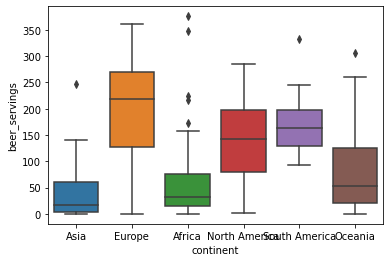

In [8]:
import seaborn as sns 
# Boxplot for the number of beer servings on each continent
sns.boxplot(x = 'continent', y = 'beer_servings', data = df) 

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


(0.0, 406.67319011000995)

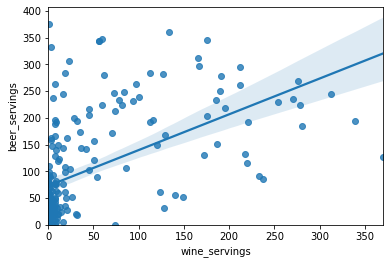

In [9]:
# Use the function  regplot to determine if the number of wine servings 
# is negatively or positively correlated with the number of beer servings
sns.regplot(x = 'wine_servings', y = 'beer_servings', data = df)
plt.ylim(0,)
# the correlation is positive

<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [10]:
from sklearn.linear_model import LinearRegression
# creation of a Linear Regression object
lm = LinearRegression()
# predictor 
X = df[['wine_servings']]
# target
Y = df[['total_litres_of_pure_alcohol']]
# get b0 and b1 attributes
lm.fit(X,Y)
# get the prediction
Yhat = lm.predict(X)
# get R^2
lm.score(X,Y)


0.4456875459787605

<br>
<b>Note:</b> Please use <code>test_size = 0.10</code> and <code>random_state = 0</code> in the following questions.


<b>Question 7: </b>Use list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:


In [13]:
from sklearn.model_selection import train_test_split
x_data = df[['beer_servings', 'spirit_servings', 'wine_servings']]
# split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_data, Y, test_size = 0.10, 
                                                    random_state = 0)
# get b0 and b1 attributes
lm.fit(x_train,y_train)

# get R^2 on test data
lm.score(x_test,y_test)


0.6990304512837944

<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
# Creation of a tuple with name of estimator model and constructor model
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree = 1)),
                                       ('mode', LinearRegression())]
# creation of pipeline object
pipe = Pipeline(Input)
#train the pipeline object with the training data
pipe.fit(x_train, y_train)
# get R^2 on test data
pipe.score(x_test, y_test)

0.6990304512837944

<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$


In [16]:
# Create a ridge regression
from sklearn.linear_model import Ridge
# Create a ridge regression object with alha = 0.1
RidgeModel = Ridge(alpha = 0.1)
#Train the model
RidgeModel.fit(x_train, y_train)
# get R^2 on test data
RidgeModel.score(x_test, y_test)

0.699030454901918

<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 


In [17]:
#Perform a 2nd order polynomial transform on both the training data and testing data
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
# Create a ridge regression object with alha = 0.1
RidgeModel_pr = Ridge(alpha = 0.1)
#Train the model
RidgeModel_pr.fit(x_train_pr, y_train)
# get R^2 on test data
RidgeModel_pr.score(x_test_pr, y_test)

0.7076376228095799

<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook


<b>Sources</b>


<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
